In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [116]:
#Importing Data
df = pd.read_csv(r"E:\DS\DATA Sets\netflix_price.csv")
df.head()

,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,Argentina,4760,3154,1606,3.74,6.30,9.26
1,Austria,5640,3779,1861,9.03,14.67,20.32
2,Bolivia,4991,3155,1836,7.99,10.99,13.99
3,Bulgaria,6797,4819,1978,9.03,11.29,13.54
4,Chile,4994,3156,1838,7.07,9.91,12.74


In [118]:
df = df.dropna()

In [125]:
col_head = df.columns
plans = np.array(col_head[4:])
plans

array(['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)',
       'Cost Per Month - Premium ($)'], dtype=object)

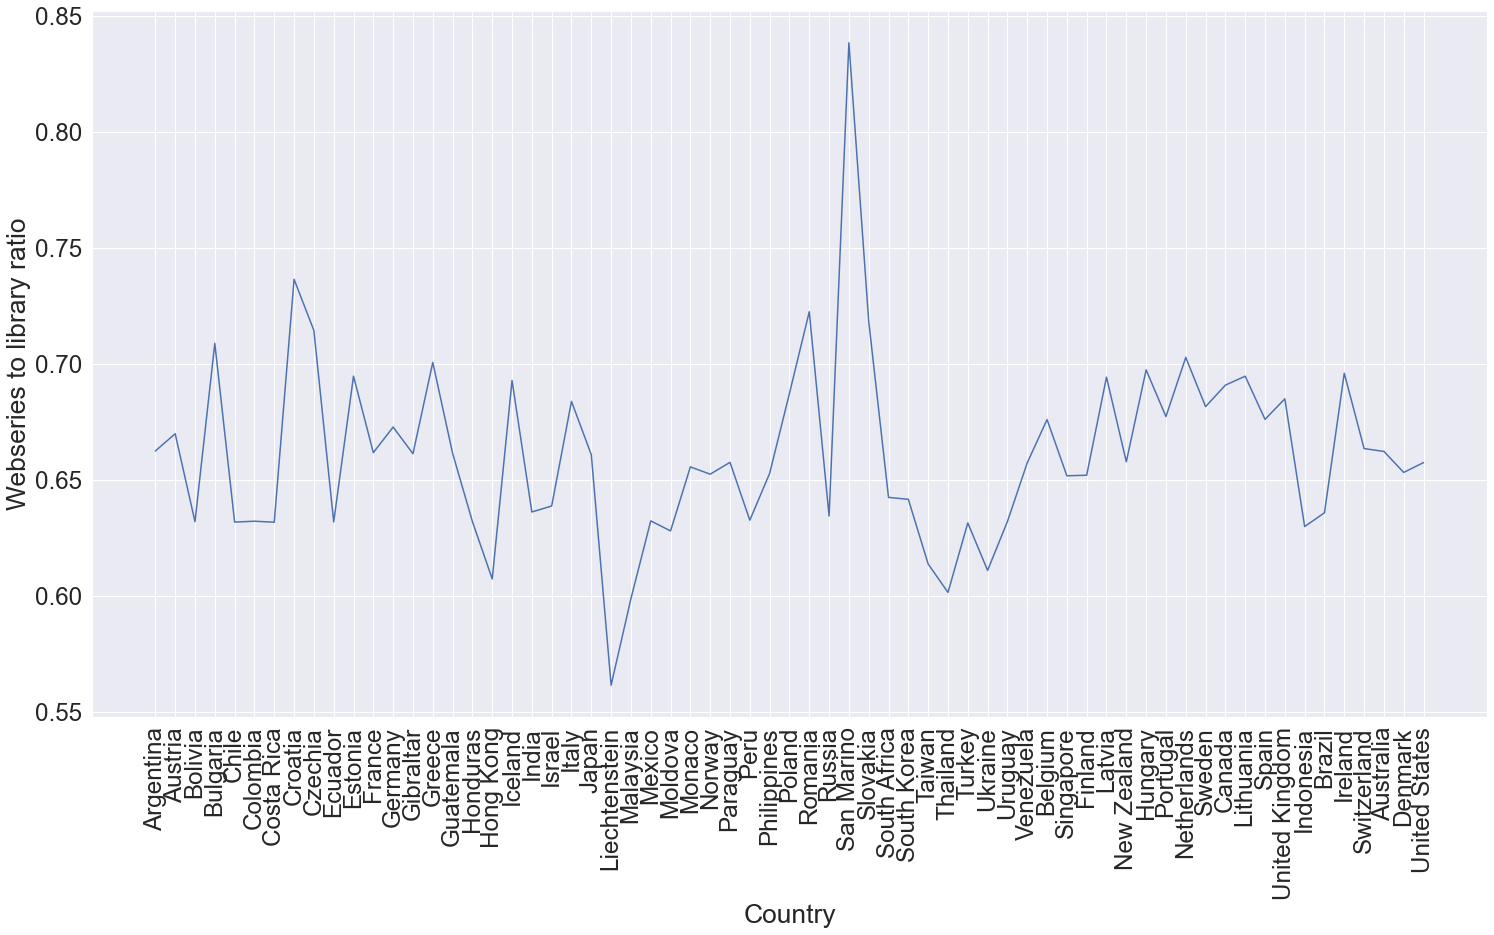

In [153]:
#webseies VS movies
sns.lineplot(x = df['Country'], y = df[col_head[2]]/df[col_head[1]], data = df)
plt.xticks(rotation = 90)
plt.ylabel('Webseries to library ratio')
plt.show()

In [126]:
total_cost = []
for i in plans:
    total_cost.append(df[i].sum())
total_cost

[543.95, 779.3499999999999, 1014.84]

In [129]:
total_plans_cost = {}
for i in range(3):
    total_plans_cost[plans[i]] = total_cost[i]
total_plans_cost

{'Cost Per Month - Basic ($)': 543.95,
 'Cost Per Month - Standard ($)': 779.3499999999999,
 'Cost Per Month - Premium ($)': 1014.84}

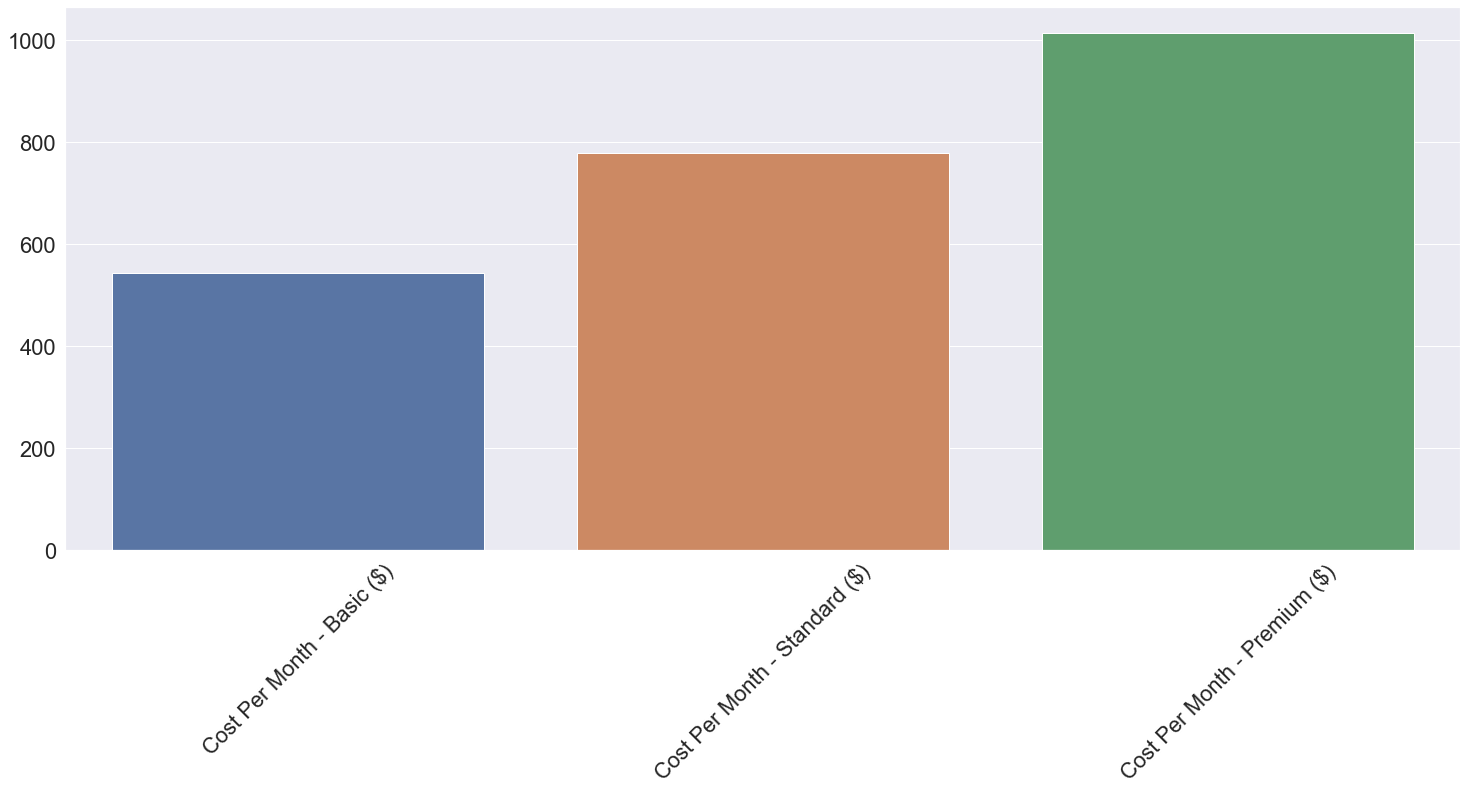

In [133]:
sns.barplot(x= plans , y = total_cost)
plt.xticks(rotation=45)
sns.set(rc = {'figure.figsize':(25,10)}, font_scale = 2)
plt.show()

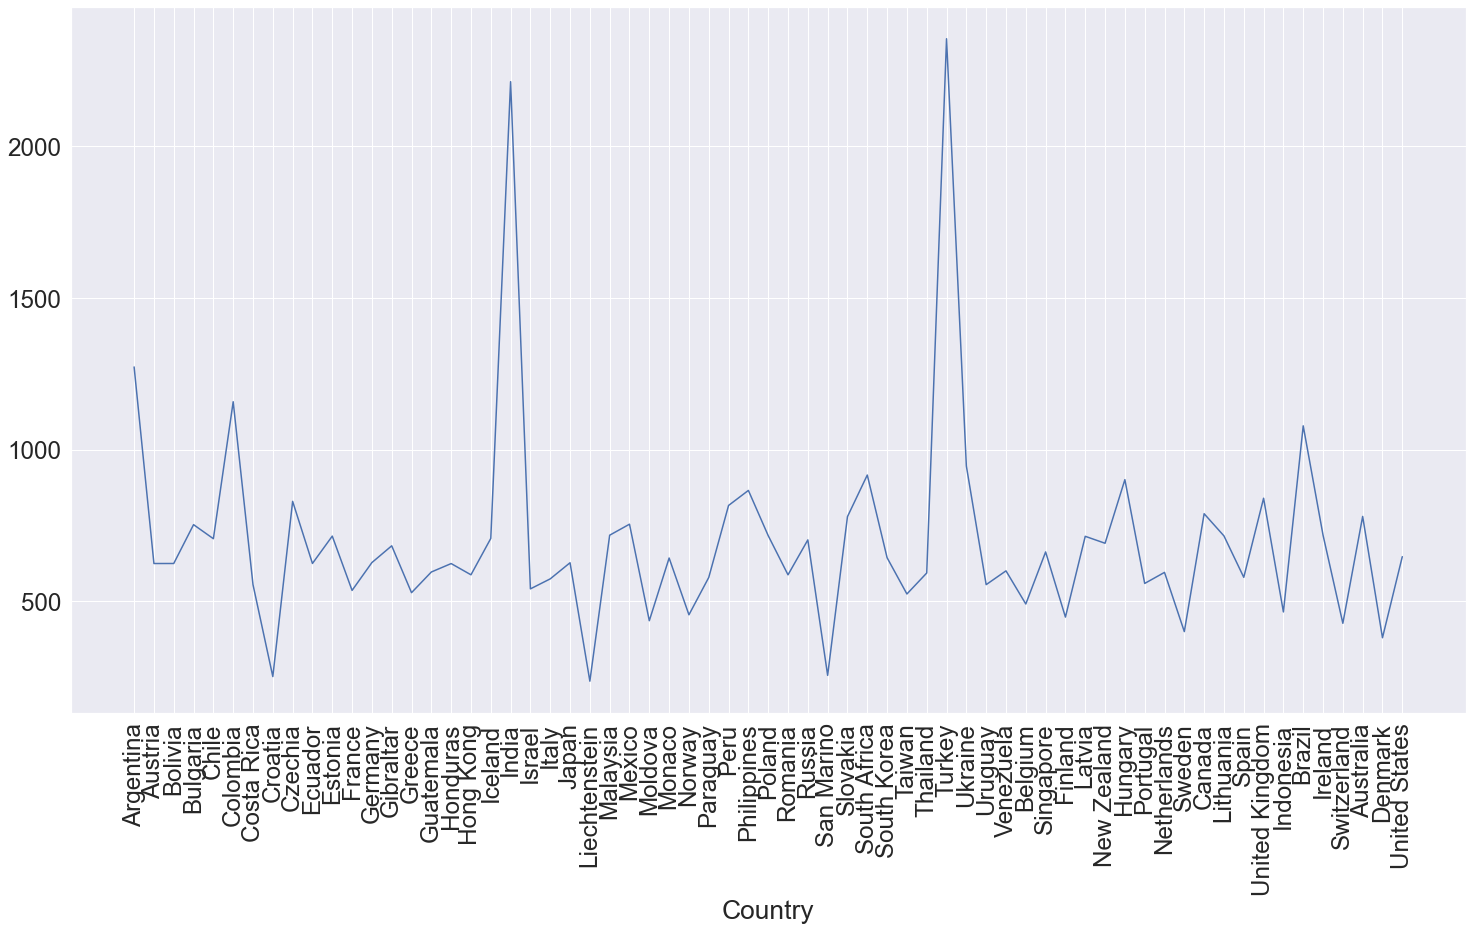

In [146]:
#Finding the countries having highest numbers of shows per dollar (with Basic plan)
basic_shows_per_dollar = df[col_head[1]]/ df[col_head[4]]
sns.lineplot(x= df['Country'], y = basic_shows_per_dollar, data = df )
plt.xticks(rotation = 90)
sns.set(rc = {'figure.figsize':(25,13)}, font_scale = 2.2)
plt.show()

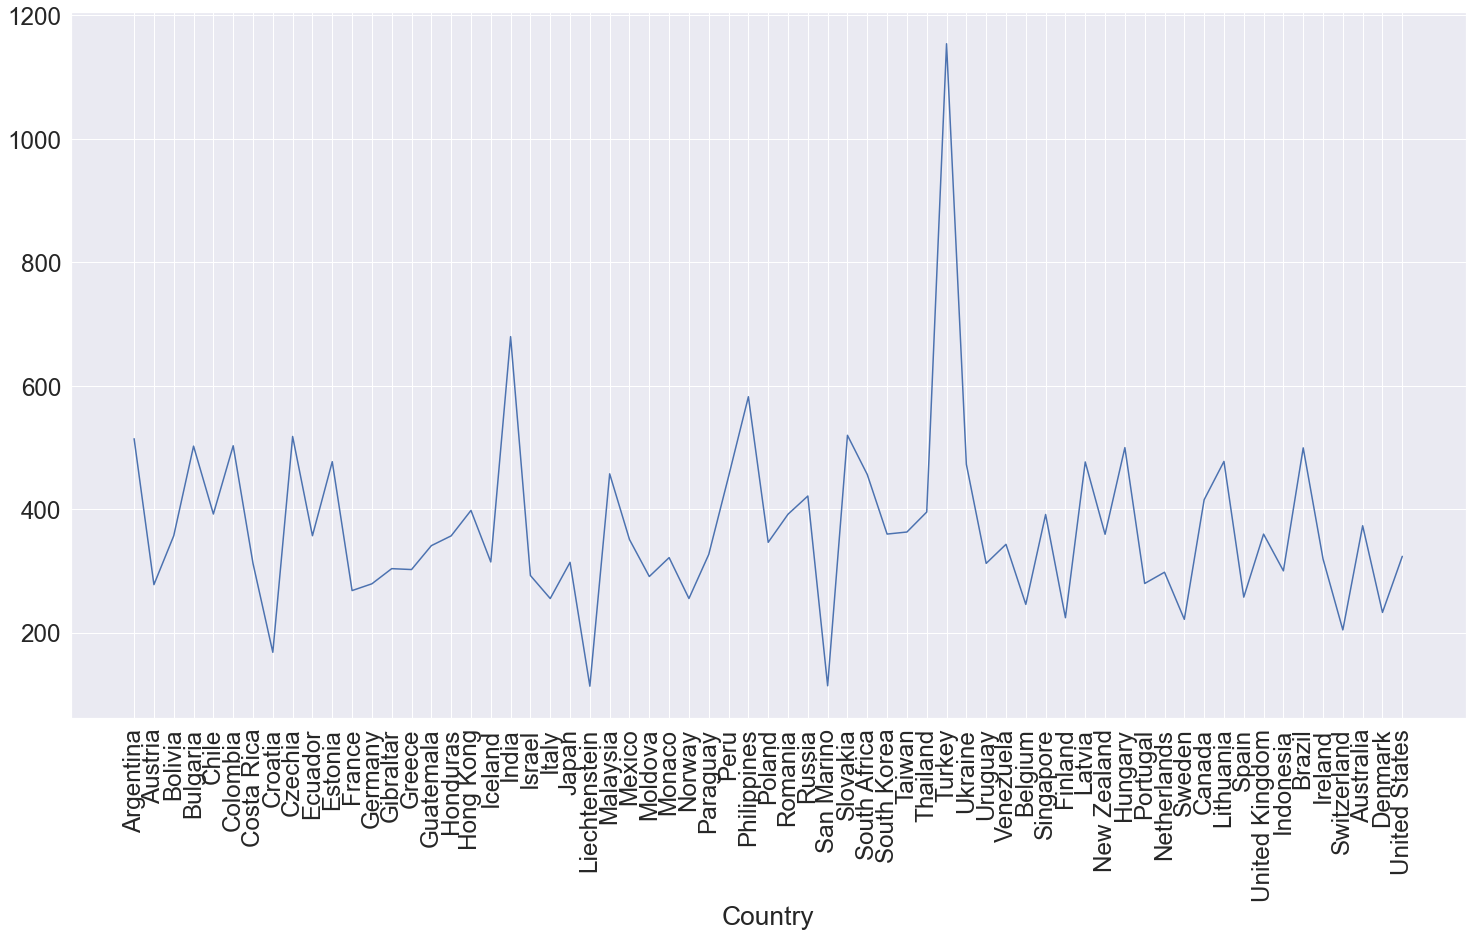

In [148]:
#Finding the countries having lowest numbers of shows per dollar (with Premium plan)
premium_shows_per_dollar = df[col_head[1]]/ df[col_head[6]]
sns.lineplot(x = df['Country'], y = premium_shows_per_dollar  , data = df)
sns.set(rc = {'figure.figsize':(25,13)}, font_scale = 2.2)
plt.xticks(rotation = 90)
plt.show()

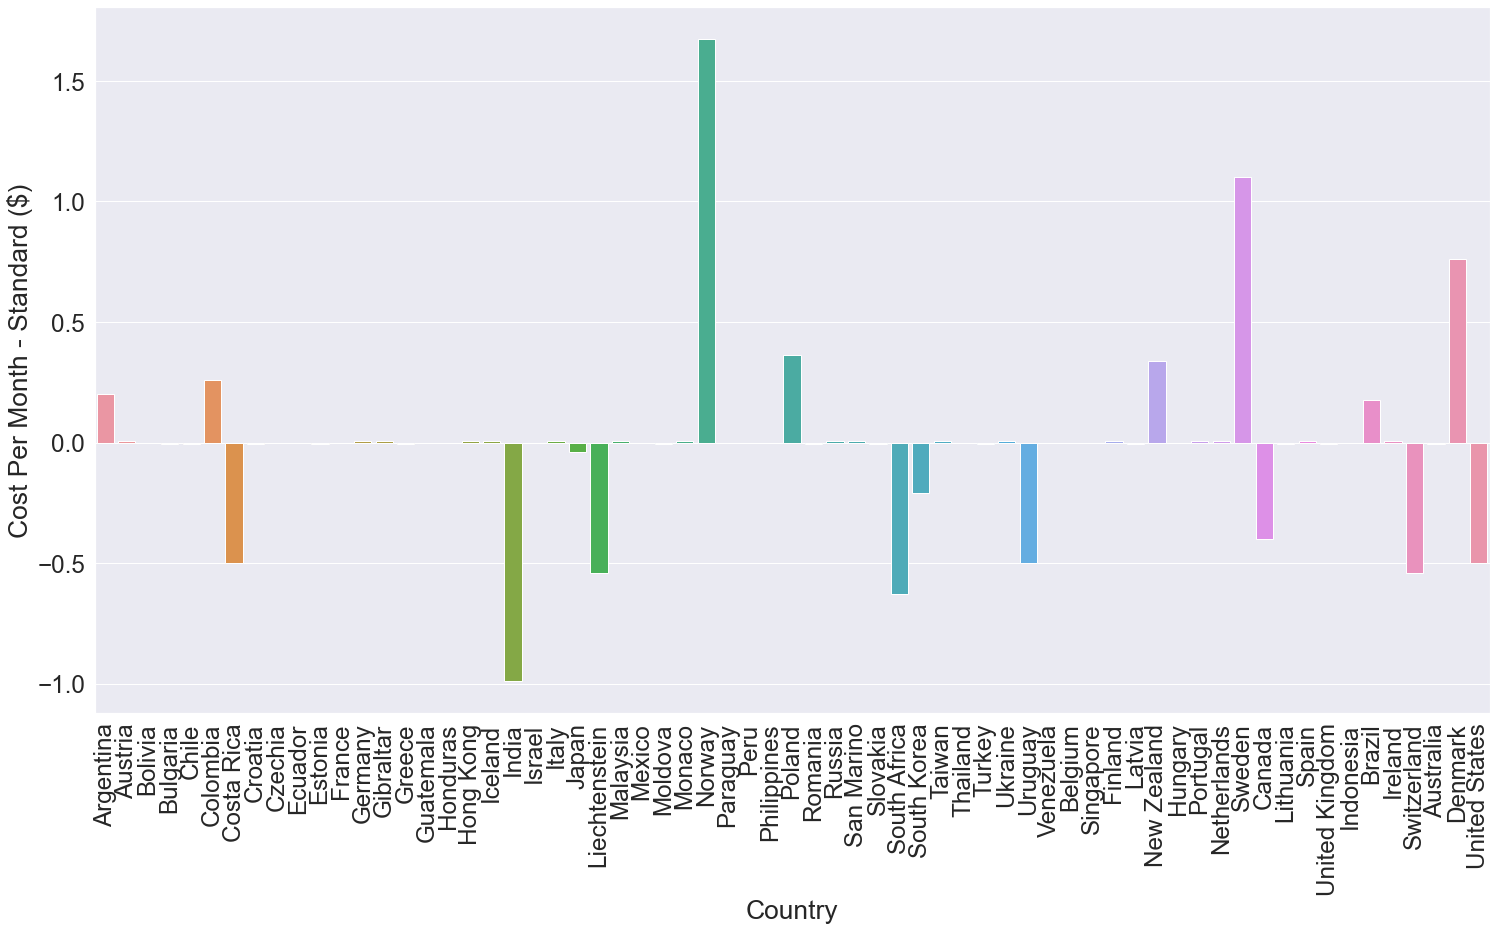

In [155]:
#deviation of standard price from the mean of basic and premium prices
Basic_Price = df[col_head[4]]
Premium_Price = df[col_head[6]]
k = len(df)
mean = []
for i in range(k):
    mean.append((Basic_Price[i]+ Premium_Price[i])/2)
dev = mean - df["Cost Per Month - Standard ($)"]
sns.barplot(x = df['Country'], y = dev, data = df)
plt.xticks(rotation = 90)
plt.show()

In [158]:
#Finding the countries having numbers of shows per dollar with Standard plan
standard_shows_per_dollar = df[col_head[1]]/ df[col_head[5]]


In [163]:
mean1 = []
for i in range(k):
    mean1.append((basic_shows_per_dollar[i] + premium_shows_per_dollar[i])/2)
#deviation
devi = mean1 - standard_shows_per_dollar
devi

0     137.827519
1      66.613809
2      36.565195
3      25.316434
4      45.243903
         ...    
60     76.605880
61     46.746020
62     71.984192
63      3.133666
64     69.414225
Length: 65, dtype: float64

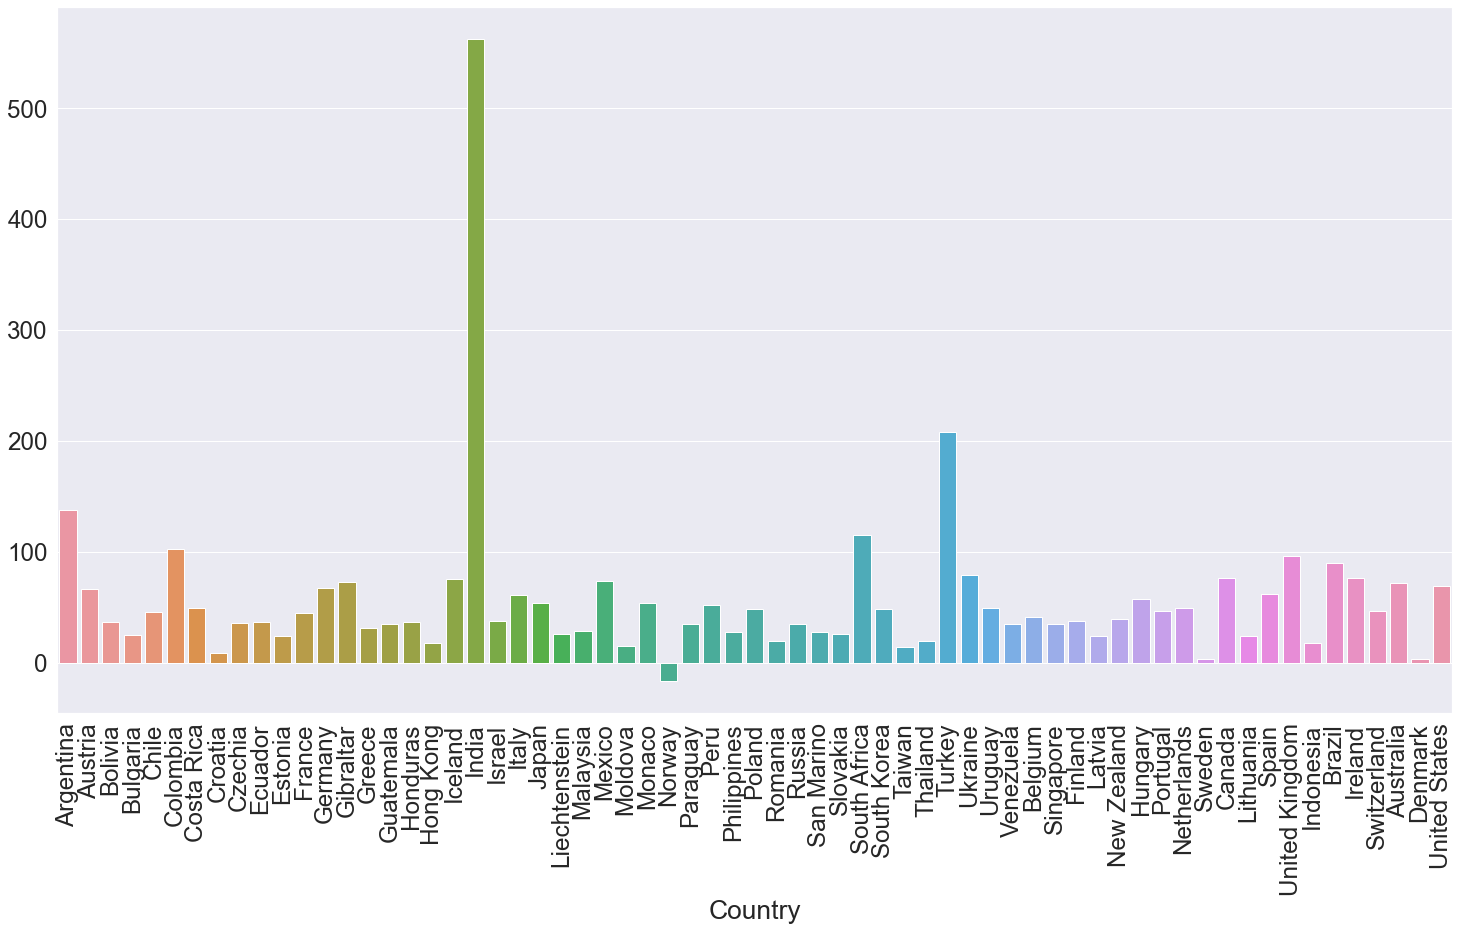

In [164]:
sns.barplot(x = df['Country'], y = devi, data = df)
plt.xticks(rotation = 90)
plt.show()